# KNN và bài toán phân loại hoa Iris (Dataset thuộc scikit-learn)

## Chuẩn bị dữ liệu

In [160]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn import model_selection
import sklearn.neighbors as skn
import pandas as pd
## Hiển thị data

In [161]:
data = datasets.load_iris().data
test_size = 130

# Concatenate GroundTruth of class Column to data
data = np.concatenate((data, iris.target.reshape((len(iris.target),1))),axis=1)

# Split train and test set
Train, test = model_selection.train_test_split(data, random_state=1, test_size= test_size)
Train_set = np.array(Train)[:,:4]
Y_train = np.array(Train)[:,4]

test_set = np.array(test)[:,:4]
Y_test = np.array(test)[:,4]

In [162]:
pd.DataFrame(Train)[pd.DataFrame(Train)[4] == 1]

,0,1,2,3,4
1,5.9,3.0,4.2,1.5,1.0
2,6.1,2.9,4.7,1.4,1.0
4,6.7,3.1,4.7,1.5,1.0
5,5.7,2.9,4.2,1.3,1.0
6,6.2,2.2,4.5,1.5,1.0
7,7.0,3.2,4.7,1.4,1.0
12,6.1,2.8,4.0,1.3,1.0
14,5.7,2.6,3.5,1.0,1.0
17,6.3,2.5,4.9,1.5,1.0


Ta cần nghiên cứu về dữ liệu sau đó là nghiên cứu về bài toán để xác định input và output
### Bước 1: Nghiên cứu dữ liệu
![ALT_TEXT_FOR_SCREEN_READERS](https://camo.githubusercontent.com/3e85641511b4fdcb2d01ea7865070356aa933fd60598e44212b2a4441e3cfb4f/687474703a2f2f7777772e6d6174682e756d642e6564752f7e706574657273642f3636362f68746d6c2f697269735f776974685f6c6162656c732e6a7067)

Dựa trên các kiến thức nền tảng về nhóm loài hoa Iris, người ta phân chia chúng thành nhiều loại (categories). 
Bằng cách dữ liệu về chiều dài và chiều rộng của `sepal` và `petal` được cung cấp, chúng ta sẽ cố gắng phân loại loài hoa.

#### Bài toán: Classification
Dữ liệu: The Iris Dataset (Scikit-learn). Cấu trúc của dữ liệu bao gồm:
- 3 Class:  Setosa, Versicolour, Virginica
- One point data include: `Sepal_Length`, `Sepal_Width`, `Petal_Length`, `Petal_Width`
- Whole dataset is $150 \times 4$ `numpy.ndarray`

Theo quan điểm của tôi, việc xây dựng thuật toán và áp dụng nó lên tập dữ liệu là quan trọng. Nhưng đó không phải là thứ chiếm lấy hết tinh thần, tâm trí, mong muốn chiêm nghiệm và tận hưởng điểm đặc sắc của các dữ liệu trong tôi. Nếu tôi có cơ hội áp dụng KNN trên tập dữ liệu Iris Flower này, tôi đã và sẽ dành thêm một vài buổi chỉ để tra cứu tìm tòi hình ảnh của chúng trên thế giới này. Tôi đụng đến "Setosa Iris", "Versicolour Iris", "Virginica Iris" trong dữ liệu, thì tâm hồn tôi cũng thắc mắc nhìn chúng bằng mắt thì ra sao? chúng có màu gì, to hay bé?, có phần nào dài, phần nào hẹp trên cánh hoa,... . Tôi thấy vui vẻ khi được đọc những dòng mô tả chúng trên Wikipedia, thấy khó khăn khi phải phân biệt chúng với những loài hoa thuộc họ Iris khác. Do đó tôi phát sinh nhu cầu phân loại chúng và bài toán phân loại đến với tôi một cách tự nhiên, chứ không học thuật như cách ông giáo tôi giao bài về nhà và nói "Giải quyết bài toán Classification đi". 

Hihi, có vẻ như tôi biết một cách để mình được chơi, được tận hưởng niềm vui trong cái nghề làm data này. 

<center><i>"Triết lý 1: Làm Artificial Intelligence, trước khi áp dụng model, tôi sẽ ngắm nhìn vẻ đẹp của các dữ liệu mà tôi có, tôi sẽ xem thử trong thực tế nó là gì, hiện hữu như thế nào và tự rút ra một cách tự nhiên nhất những suy nghĩ có liên quan đến bài toán mà tôi cần giải quyết."</i></center>


### The example for Setosa Iris, Versicolour Iris and Virginica Iris
<p><center>Setosa Iris</center></p>

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg" style="width: 50%; height: 50%"/></center>
<center><img src = "https://m.media-amazon.com/images/I/61pLvdbjC7L._AC_UF1000,1000_QL80_.jpg" style="width: 50%; height: 50%"/></center>



<p><center>Versicolour Iris</center></p>

<center><img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKVrB-_-MvO3latqeOKfGjVYgG45ttVmCnuw&s" /></center>

<p><center>Virginica Iris</center></p>

<center><img src = "https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcRWUd65XxtvQfKkTsMO696NBZAbCnU5zrYippzKXX9J28-X7C-L" /></center>

In [163]:
def dump(obj):
    for attr in dir(obj):
        print("obj.%s = %r"%(attr,getattr(obj,attr)))

#dump(iris)


## Mô hình xây dựng là KNN (K - Nearest Neighbors)


In [164]:
neigh = skn.KNeighborsClassifier(n_neighbors=1, weights='uniform',p=6)
num_instances = iris.data.shape[0]
train_size = num_instances-test_size

neigh.fit(Train_set, Y_train)
predict_test_data = neigh.predict(test_set)

print(neigh.score(Train_set, Y_train))
print(neigh.score(test_set, Y_test))

1.0
0.9615384615384616


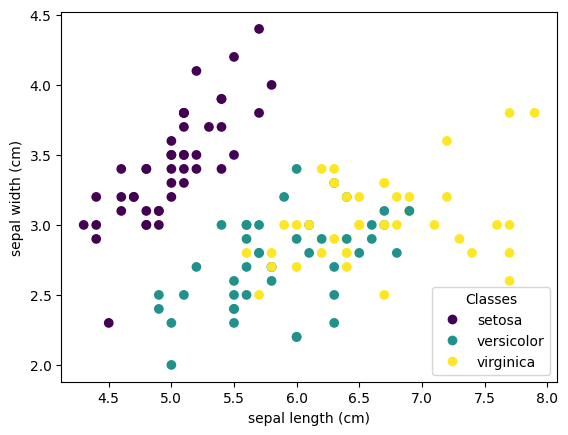

In [165]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(test_set[:,0], test_set[:,1] , c=predict_test_data)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

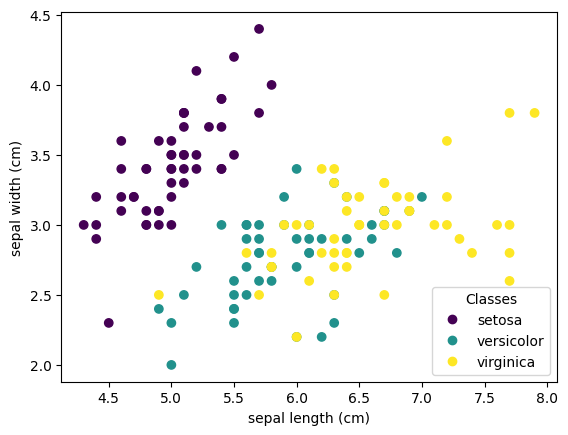

In [166]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

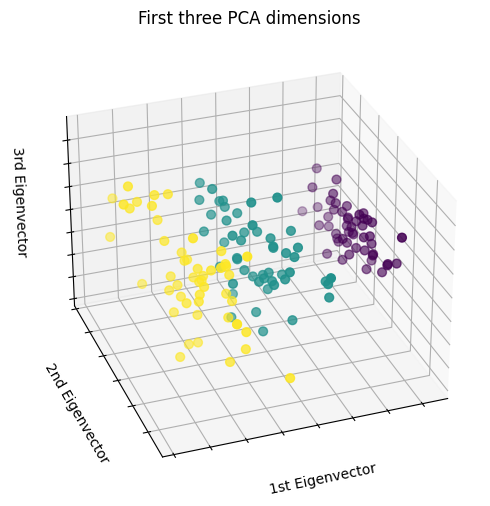

In [168]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

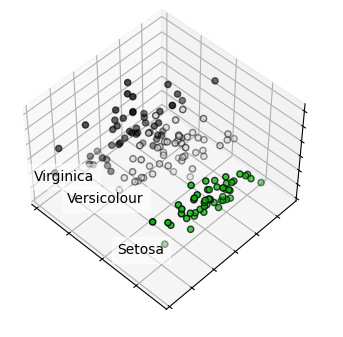

In [169]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()